# Example of disabling and reeabling hillslope and gully erosion


In [1]:
# Some steps required until these Python modules are properly installed...
import sys
sys.path.append('../Modules')
sys.path.append('../../../../veneer-py')
# Get the Source scripting components (veneer) and GBR specific stuff
import gbr

In [88]:
# Point the system at a particular output directory...
gbr.init('E:/Beckers/Output/Scenario 1/')

In [89]:
# Initialise the Veneer (Source scripting tool)
v = gbr.veneer()

In [76]:
# Also, lets switch on the performance options
v.configureOptions({'RunNetworksInParallel':True,'PreRunCatchments':True,'ParallelFlowPhase':True})
v.model.sourceScenarioOptions("PerformanceConfiguration","ProcessCatchmentsInParallel",True)


{'Exception': None,
 'Response': {'Value': True,
  '__type': 'BooleanResponse:#FlowMatters.Source.Veneer.ExchangeObjects'},
 'StandardError': '',
 'StandardOut': ''}

In [77]:
# Its a good idea to set some options in Dynamic Sednet to prevent the results window appearing
# Also, to make it automatically override existing results
#v.configureOptions{'ShowResultsAfterRun':False,'OverwriteResults':True})

In [78]:
# Query terms to find the BankHeight_M parameter...
# (Not easy!)
namespace = 'RiverSystem.Constituents.CatchmentElementConstituentData as CatchmentElementConstituentData\nimport GBR_DynSed_Extension.Models.GBR_CropSed_Wrap_Model as GBR_CropSed_Wrap_Model'
accessor_hillslope_cropping = 'scenario.Network.ConstituentsManagement.Elements.OfType[CatchmentElementConstituentData]().*FunctionalUnitData.*ConstituentModels.Where(lambda x: x.Constituent.Name=="Sediment - Fine").Where(lambda x: x.ConstituentSources[0].GenerationModel.GetType().Name=="GBR_CropSed_Wrap_Model").*ConstituentSources.*GenerationModel.ErosionModel.HillslopeFineSDR'#*Provider'#.*Model' #.*Data.ProcessingModels.Where(lambda x: x.Constituent.Name=="Sediment - Fine").*Model'
#v.model.sourceHelp(accessor_hillslope,namespace=namespace)

In [79]:
# Now run the query and get the current values
orig_hillslope_cropping_sdr = v.model.get(accessor_hillslope_cropping,namespace=namespace)
orig_hillslope_cropping_sdr

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [80]:
accessor_gully_cropping = 'scenario.Network.ConstituentsManagement.Elements.OfType[CatchmentElementConstituentData]().*FunctionalUnitData.*ConstituentModels.Where(lambda x: x.Constituent.Name=="Sediment - Fine").Where(lambda x: x.ConstituentSources[0].GenerationModel.GetType().Name=="GBR_CropSed_Wrap_Model").*ConstituentSources.*GenerationModel.GULLYmodel.Gully_SDR_Fine'#*Provider'#.*Model' #.*Data.ProcessingModels.Where(lambda x: x.Constituent.Name=="Sediment - Fine").*Model'
#v.model.sourceHelp(accessor_gully,namespace=namespace)

In [81]:
orig_gully_cropping_sdr = v.model.get(accessor_gully_cropping,namespace=namespace)
orig_gully_cropping_sdr

[15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

In [82]:
#accessor_hillslope_grazing = 'scenario.Network.ConstituentsManagement.Elements.OfType[CatchmentElementConstituentData]().*FunctionalUnitData.*ConstituentModels.Where(lambda x: x.Constituent.Name=="Sediment - Fine").Where(lambda x: x.ConstituentSources[0].GenerationModel.GetType().Name=="SedNet_Sediment_Generation").*ConstituentSources.*GenerationModel'#.ErosionModel.HillslopeFineSDR'#*Provider'#.*Model' #.*Data.ProcessingModels.Where(lambda x: x.Constituent.Name=="Sediment - Fine").*Model'
#v.model.sourceHelp(accessor_hillslope_grazing,namespace=namespace)

In [83]:
#accessor_fine_sediment_model_types = 'scenario.Network.ConstituentsManagement.Elements.OfType[CatchmentElementConstituentData]().*FunctionalUnitData.*ConstituentModels.Where(lambda x: x.Constituent.Name=="Sediment - Fine").*ConstituentSources.*GenerationModel.GetType().Name'#.ErosionModel.HillslopeFineSDR'#*Provider'#.*Model' #.*Data.ProcessingModels.Where(lambda x: x.Constituent.Name=="Sediment - Fine").*Model'
#v.model.get(accessor_fine_sediment_model_types,namespace=namespace)

In [84]:
# Run with those original values

# First, set the name of the run
v.model.set('scenario.CurrentConfiguration.runName','RUN_ORIGINAL_SDR')

In [86]:
# Now, lets run the model... When this cell executes in Python, the run window should appear in Source...
v.run_model()

(302, 'runs/1')

In [10]:
# NOTE: The above output (eg runs/1) is a point to retrieving the 'normal' Source results - ie all the time series recorders...
# We don't need that for GBR/Dynamic Sednet, because we can get to the summarised results

In [90]:
# Lets take a quick look at those results...
results_original = gbr.Results('RUN_ORIGINAL_SDR')
results_original.queries.regional_export('t/y')

SummaryRegion,agbot,agmid,agtop
Constituent,,,
Ametryn,0.000000e+00,0.000000e+00,0.000000e+00
Atrazine,0.000000e+00,0.000000e+00,0.000000e+00
Flow,5.624489e+08,4.831968e+08,2.044276e+08
N_DIN,1.077308e+05,9.218189e+04,3.776663e+04
N_DON,1.077308e+05,9.218189e+04,3.776663e+04
N_Particulate,3.785963e+05,2.148457e+05,2.693409e+05
P_DOP,9.998935e+04,8.685934e+04,3.633789e+04
P_FRP,9.998935e+04,8.685934e+04,3.633789e+04
P_Particulate,3.492753e+05,6.534447e+05,1.606461e+05


In [12]:
# We can set every 'instance' of BankHeight_M - ie in every link- to a single value, with
#
# v.model.set(accessor,2.0)
#
# or we can pass in a list of values
#
# v.model.set(accessor,[0.2,0.3,0.5,0.4,1.0],fromList=True)
#
# Now... If your list of values is shorter than the number of instances... (ie # links),
# then the list will be 'recycled'... That is, the list will be reused repeatedly until values have been assigned to all
# instances...
#
# ie... Given that the Becker's model has 5 Links, [0.2,0.3] to saying [0.2,0.3,0.2,0.3,0.2]

In [91]:
# Set to a constant, 2
v.model.set(accessor_gully_cropping,0,namespace=namespace)
v.model.set(accessor_hillslope_cropping,0,namespace=namespace)

In [92]:
# Check that it took effect
v.model.get(accessor_gully_cropping,namespace=namespace)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [93]:
# Now change the run name
v.model.set('scenario.CurrentConfiguration.runName','RUN_CHANGED_SDR')

In [94]:
v.run_model()

(302, 'runs/2')

In [95]:
results_changed = gbr.Results('RUN_CHANGED_SDR')
results_changed.queries.regional_export('t/y')

SummaryRegion,agbot,agmid,agtop
Constituent,,,
Ametryn,0.000000e+00,0.000000e+00,0.000000e+00
Atrazine,0.000000e+00,0.000000e+00,0.000000e+00
Flow,5.624489e+08,4.831968e+08,2.044276e+08
N_DIN,1.077308e+05,9.218189e+04,3.776663e+04
N_DON,1.077308e+05,9.218189e+04,3.776663e+04
N_Particulate,3.854187e+05,2.215998e+05,2.798994e+05
P_DOP,9.998935e+04,8.685934e+04,3.633789e+04
P_FRP,9.998935e+04,8.685934e+04,3.633789e+04
P_Particulate,3.533384e+05,6.591090e+05,1.659269e+05


In [96]:
# Now that we've done both runs, we probably want to put the parameter back to normal...
v.model.set(accessor_hillslope_cropping,orig_hillslope_cropping_sdr,namespace=namespace,fromList=True)

In [97]:
v.model.set(accessor_gully_cropping,orig_gully_cropping_sdr,namespace=namespace,fromList=True)

In [98]:
v.model.get(accessor_hillslope_cropping,namespace=namespace)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [102]:
time_series_directory = 'E:/Beckers/Output/Scenario 1/RUN_CHANGED_SDR/TimeSeries/'

In [101]:
location = 'Outlet Node1'
import pandas as pd


<function pandas.io.parsers._make_parser_function.<locals>.parser_f>

In [107]:
flows = pd.read_csv(time_series_directory+'Flows/Flow_'+location+'_cubicmetrespersecond.csv',names=['Date','Flow'],index_col=0,parse_dates=True,dayfirst=True)
flows

,Flow
Date,
2000-01-01,0.092593
2000-01-02,0.092593
2000-01-03,0.092593
2000-01-04,118.264800
2000-01-05,5.716735
2000-01-06,8.190269
2000-01-07,1.548843
2000-01-08,0.092593
2000-01-09,2.029268


In [108]:
loads = pd.read_csv(time_series_directory+'Sediment - Fine/Sediment - Fine_'+location+'_kilograms.csv',names=['Date','Sediment - Fine'],index_col=0,parse_dates=True,dayfirst=True)
loads

,Sediment - Fine
Date,
2000-01-01,3.155294e+02
2000-01-02,3.155294e+02
2000-01-03,2.821000e+01
2000-01-04,9.387677e+06
2000-01-05,4.475382e+05
2000-01-06,8.408319e+05
2000-01-07,1.498177e+05
2000-01-08,1.617581e+04
2000-01-09,2.401109e+05


In [110]:
combined = pd.DataFrame([flows.Flow,loads['Sediment - Fine']]).transpose()
combined

,Flow,Sediment - Fine
Date,,
2000-01-01,0.092593,3.155294e+02
2000-01-02,0.092593,3.155294e+02
2000-01-03,0.092593,2.821000e+01
2000-01-04,118.264800,9.387677e+06
2000-01-05,5.716735,4.475382e+05
2000-01-06,8.190269,8.408319e+05
2000-01-07,1.548843,1.498177e+05
2000-01-08,0.092593,1.617581e+04
2000-01-09,2.029268,2.401109e+05


In [111]:
combined.Flow *= 86.4

In [112]:
combined['Sediment - Fine'] *= 1000

In [113]:
combined

,Flow,Sediment - Fine
Date,,
2000-01-01,8.000000,3.155294e+05
2000-01-02,8.000000,3.155294e+05
2000-01-03,8.000000,2.821000e+04
2000-01-04,10218.078711,9.387677e+09
2000-01-05,493.925892,4.475382e+08
2000-01-06,707.639219,8.408319e+08
2000-01-07,133.820056,1.498177e+08
2000-01-08,8.000000,1.617581e+07
2000-01-09,175.328789,2.401109e+08


In [115]:
combined['concentration'] = combined['Sediment - Fine']/combined.Flow

Populating the interactive namespace from numpy and matplotlib


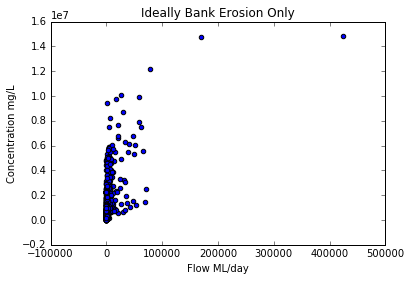

In [122]:
%pylab inline
scatter(x=combined.Flow,y=combined.concentration)
xlabel('Flow ML/day')
ylabel('Concentration mg/L')
title('Ideally Bank Erosion Only')

In [120]:
scatter?